In [1]:
import networkx as nx 
from networkx.drawing.nx_agraph import write_dot, graphviz_layout #TODO
import matplotlib.pyplot as plt 

In [2]:
def validate_text(text):
    last = "$"
    return text if text[-1] == last else text + last

# Trie

In [3]:
class Trie_tree:
    class Node:
        def __init__(self, letter = "", parent = None, depth = 0):
            self.children = dict()
            self.parent = parent

            self.letter = letter
            self.depth = depth 

    def __init__(self, text):
        self.root = self.Node()
        self.full_text = validate_text(text)
        
        for i in range(len(text)):
            node = self.root
        
            for a in self.full_text[i:]:
                if a not in node.children:
                    node.children[a] = self.Node(letter = a, parent = node, depth = node.depth + 1)

                node = node.children[a]    
                
    def __contains__(self, text):
        node = self.root
        
        for c in text:
            if c not in node.children:
                return False
            node = node.children[c]
        return True
    
    def visualize(self, figsize = (15,15)):
        print("full text:", self.full_text)
        plt.figure(figsize=figsize)
        G = nx.DiGraph()

        q = []
        q.append(self.root)
        i = 0
        while(q):
            node = q.pop()
            node.index = i

            G.add_node(node.index, label = node.letter)

            if node.parent is not None:
                G.add_edge(node.parent.index, node.index)
            i+=1

            for child in node.children.values():
                q.append(child)

        pos = graphviz_layout(G, prog='dot')

        labels = {u : l['label'] for u, l in G.nodes(data = True)}

        nx.draw_networkx_edges(G, pos, arrows=True) 
        nx.draw_networkx_labels(G, pos, labels, font_size = 15)

        plt.show()

In [4]:
trie = Trie_tree("abaaba")

full text: abaaba$


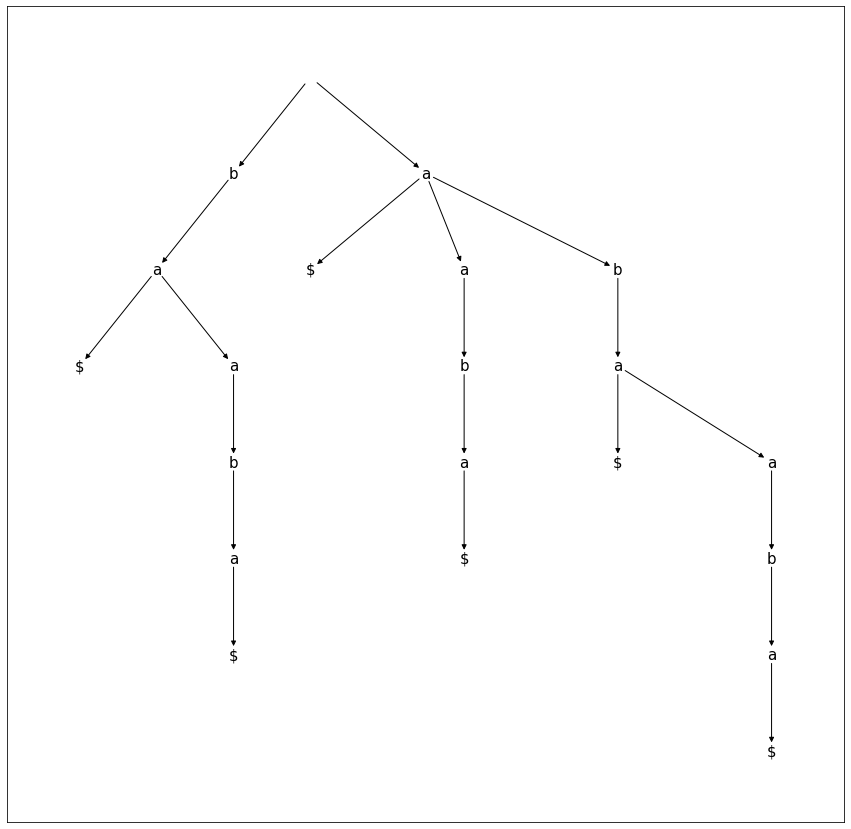

In [5]:
trie.visualize()

In [6]:
"baab" in trie

True

# Suffix tree

In [7]:
class Suffix_tree:
    class Node:
        def __init__(self, start = 0, end = 0, depth = 0, parent = None):
            self.children = {}
            self.parent = parent
            
            self.start = start
            self.end = end
            
            self.depth = depth
        
        def __len__(self):
            return self.end - self.start
        
        def get_label(self, text):
            return text[self.start:self.end]
                
            
    def __init__(self, text):
        self.root = self.Node()
        self.full_text = validate_text(text)
        
        for i in range(len(text)):
            node = self.find(self.full_text[i:])
            self.add_suffix(node, i)
    
    def find(self, text): #szukam miejsca gdzie wstawic tekst
        node = self.root
        
        while True:
            if len(text) == 0 or text[0] not in node.children:
                return node

            child = node.children[text[0]]
            for i in range(1, len(child)):
                if child.get_label(self.full_text)[i] != text[i]: #szukam momentu gdzie stringi sie nie zgadzaja
                    return self.divide_node(node, text[:i]) #w to miejsce nalezy wstawic rozgalezienie

            #jesli tekst w wezle i prefix tekstu sa zgodne to przechodze do dziecka
            node = child
            text = text[len(child):]
    
    def divide_node(self, node, text): #wstawiam miedzy node a jego dziecko dodatkowy wezel
        child = node.children[text[0]]
        
        new_node = self.Node(start = child.start, end = child.start + len(text), 
                             depth = node.depth + len(text), parent = node)
        
        child.start += len(text)
        child.parent = new_node
        
        new_node.children[child.get_label(self.full_text)[0]] = child
        node.children[text[0]] = new_node
        
        return new_node
    
    def add_suffix(self, node, from_ind): #dodaje nowy wezel z suffixem 
        start = from_ind + node.depth
        suffix = self.full_text[start:]
        
        child = self.Node(start = start, end = len(self.full_text),
                          depth = node.depth + len(suffix), parent = node)
        node.children[suffix[0]] = child
        
        
    def __contains__(self, text):
        node = self.root
        
        while len(text) > 0:
            if text[0] not in node.children:
                return False
            child = node.children[text[0]]

            to = min(len(child), len(text))
            if child.get_label(self.full_text)[:to] != text[:to]:
                return False
            
            node = child
            text = text[len(child):]
            
        return True
        
    def visualize(self, figsize = (15, 15)):
        print("full text:", self.full_text)
        
        plt.figure(figsize=figsize)
        G = nx.DiGraph()

        q = []
        q.append(self.root)
        i = 0
        while(q):
            node = q.pop()
            node.index = i

            G.add_node(node.index, label = node.get_label(self.full_text))

            if node.parent is not None:
                G.add_edge(node.parent.index, node.index)
            i+=1

            for child in node.children.values():
                q.append(child)

        pos = graphviz_layout(G, prog='dot')

        labels = {u : l['label'] for u, l in G.nodes(data = True)}

        nx.draw_networkx_edges(G, pos, arrows=True) 
        nx.draw_networkx_labels(G, pos, labels, font_size = 15)

        plt.show()
            

In [8]:
suffixTree = Suffix_tree("abaaba")

In [9]:
"baab" in suffixTree

True

full text: abaaba$


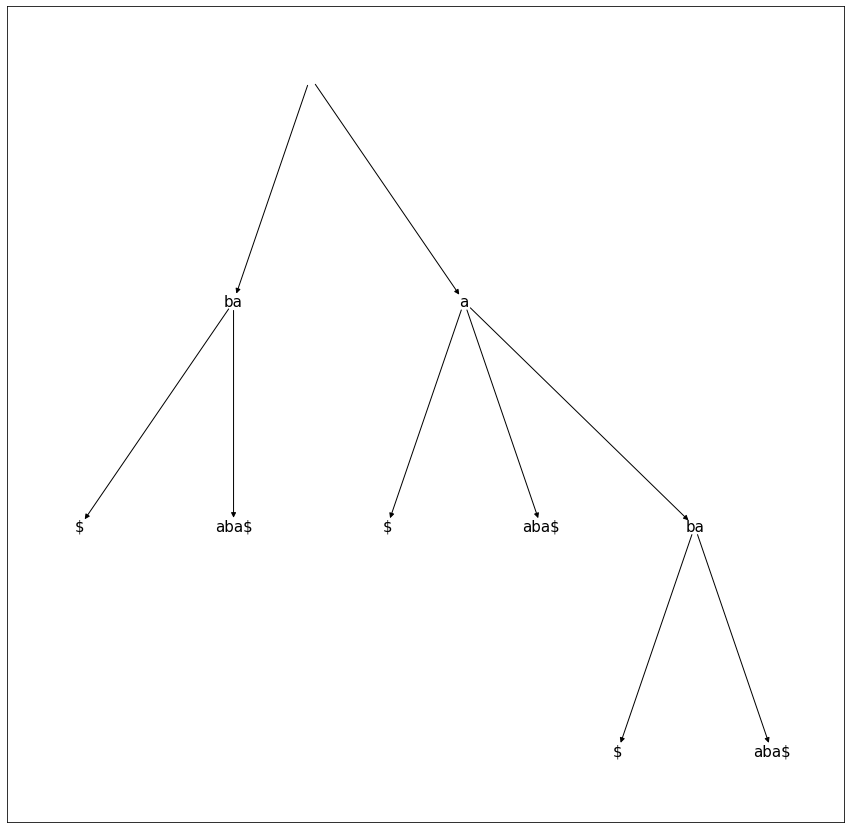

In [10]:
suffixTree.visualize()

# Porównanie szybkości budowy

In [11]:
from time import time

def performance_test(text):
    print(text)
    start_trie = time()
    Trie_tree(text)
    end_trie = time()
    
    start_suffix_tree = time()
    Suffix_tree(text)
    end_suffix_tree = time()
    
    print("trie:       ", end_trie - start_trie)
    print("suffix tree:", end_suffix_tree - start_suffix_tree)
    print("\n\n")

In [12]:
tests = ["bbbd", "aabbabd", "ababcd", "abcbccd", open("1997_714_head.txt", encoding="utf8").read()]

In [13]:
for test in tests:
    performance_test(test)

bbbd
trie:        2.2172927856445312e-05
suffix tree: 2.2411346435546875e-05



aabbabd
trie:        2.5987625122070312e-05
suffix tree: 1.9550323486328125e-05



ababcd
trie:        2.288818359375e-05
suffix tree: 2.6464462280273438e-05



abcbccd
trie:        2.5272369384765625e-05
suffix tree: 1.9311904907226562e-05







Dz.U. z 1998 r. Nr 144, poz. 930
                                       
                                       
                                       
                                       
                                    USTAWA
                          z dnia 20 listopada 1998 r.
                                       
         o zryczałtowanym podatku dochodowym od niektórych przychodów
                        osiąganych przez osoby fizyczne
                                       
                                  Rozdział 1
                                Przepisy ogólne
                                       
                                    Art. 1.

# Porownanie czasow wyszukiwania

In [14]:
def searching_test(text, search_for):
    print("searching for:", search_for)
    trie = Trie_tree(text)
    suffix_tree = Suffix_tree(text)

    start_trie = time()
    print("trie:      ", search_for in trie)
    end_trie = time()
    
    start_suffix_tree = time()
    print("suffix tree", search_for in suffix_tree)
    end_suffix_tree = time()
    
    
    print("trie:       ", end_trie - start_trie)
    print("suffix tree:", end_suffix_tree - start_suffix_tree)
    print("\n\n")

In [15]:
searching_test(open("1997_714_head.txt", encoding="utf8").read(), "przychodami")
searching_test(open("1997_714_head.txt", encoding="utf8").read(), "tego nie ma")

searching for: przychodami
trie:       True
suffix tree True
trie:        0.00010371208190917969
suffix tree: 2.2411346435546875e-05



searching for: tego nie ma
trie:       False
suffix tree False
trie:        9.894371032714844e-05
suffix tree: 1.6450881958007812e-05



